In [1]:
"""
Notebook version of the new clustering algorithm
"""

'\nNotebook version of the new clustering algorithm\n'

In [2]:
from yuval_module.paper_clusterer import PaperClusterer
from yuval_module.paper_source import PaperSource
import sys
import pandas as pd
import numpy as np
import s3_functions as s3func


%matplotlib inline

In [3]:
def load_dataset(set_name):
    ps=PaperSource()
    ps.load_dataset(set_name)
    return ps

In [4]:
def get_res_papers(ps,author_name):
    df=ps.get_dataset()
    return df[df['last_author_name']==author_name]

In [5]:
#ps=load_dataset('enriched_labeled')
ps=load_dataset('mini')


In [6]:
df=ps.get_dataset()

df.head(5)

,pmid,PI_IDS,last_author_name,authors,doi,journal_name,language,last_author,last_author_country,last_author_email,last_author_id,last_author_inst,mesh,mesh_major,pub_year,title
0,19810465,8352708,"Madabhushi, A","[{'forename': 'Pallavi', 'affiliation': 'Depar...",None,Medical physics,eng,None,Jersey,None,2517051.0,None,"[Humans, Linear Models, Male, Pilot Projects, ...","[Algorithms, Cluster Analysis, Diagnosis, Comp...",2009.0,A hierarchical spectral clustering and nonline...
1,26167385,8352708,"Madabhushi, A","[{'forename': 'Akshay', 'affiliation': 'Depart...",None,Journal of pathology informatics,eng,{'affiliation': 'Department of Biomedical Engi...,United States,None,NaN,"Rutgers, The State University of New Jersey",None,None,2015.0,Content-based image retrieval of digitized his...
2,26870745,8352708,"Madabhushi, A","[{'forename': 'Pallavi', 'affiliation': 'Case ...",None,"Journal of medical imaging (Bellingham, Wash.)",eng,{'affiliation': 'Case Western Reserve Universi...,United States,None,NaN,Case Western Reserve University,None,None,2015.0,Association of computerized texture features o...
3,25958195,8352708,"Madabhushi, A","[{'forename': 'Jun', 'affiliation': 'Jiangsu K...",10.1016/j.compmedimag.2015.04.002,Computerized medical imaging and graphics : th...,eng,{'affiliation': 'Department of Biomedical Engi...,United States,None,1576937.0,Case Western Reserve University,"[Coloring Agents, Female, Humans, Models, Stat...","[Algorithms, Breast/pathology, Color, Image En...",2015.0,Sparse Non-negative Matrix Factorization (SNMF...
4,25993029,8352708,"Madabhushi, A","[{'forename': 'Ajay', 'affiliation': 'Departme...",None,PloS one,eng,{'affiliation': 'Department of Biomedical Engi...,United States,None,1576937.0,Case Western Reserve University,"[Algorithms, Datasets as Topic, Female, Humans...","[Breast Neoplasms/diagnosis, Diagnosis, Comput...",2015.0,Predicting classifier performance with limited...


In [7]:
df=get_res_papers(ps,'Madabhushi, A')

In [8]:
df.head()

,pmid,PI_IDS,last_author_name,authors,doi,journal_name,language,last_author,last_author_country,last_author_email,last_author_id,last_author_inst,mesh,mesh_major,pub_year,title
0,19810465,8352708,"Madabhushi, A","[{'forename': 'Pallavi', 'affiliation': 'Depar...",None,Medical physics,eng,None,Jersey,None,2517051.0,None,"[Humans, Linear Models, Male, Pilot Projects, ...","[Algorithms, Cluster Analysis, Diagnosis, Comp...",2009.0,A hierarchical spectral clustering and nonline...
1,26167385,8352708,"Madabhushi, A","[{'forename': 'Akshay', 'affiliation': 'Depart...",None,Journal of pathology informatics,eng,{'affiliation': 'Department of Biomedical Engi...,United States,None,NaN,"Rutgers, The State University of New Jersey",None,None,2015.0,Content-based image retrieval of digitized his...
2,26870745,8352708,"Madabhushi, A","[{'forename': 'Pallavi', 'affiliation': 'Case ...",None,"Journal of medical imaging (Bellingham, Wash.)",eng,{'affiliation': 'Case Western Reserve Universi...,United States,None,NaN,Case Western Reserve University,None,None,2015.0,Association of computerized texture features o...
3,25958195,8352708,"Madabhushi, A","[{'forename': 'Jun', 'affiliation': 'Jiangsu K...",10.1016/j.compmedimag.2015.04.002,Computerized medical imaging and graphics : th...,eng,{'affiliation': 'Department of Biomedical Engi...,United States,None,1576937.0,Case Western Reserve University,"[Coloring Agents, Female, Humans, Models, Stat...","[Algorithms, Breast/pathology, Color, Image En...",2015.0,Sparse Non-negative Matrix Factorization (SNMF...
4,25993029,8352708,"Madabhushi, A","[{'forename': 'Ajay', 'affiliation': 'Departme...",None,PloS one,eng,{'affiliation': 'Department of Biomedical Engi...,United States,None,1576937.0,Case Western Reserve University,"[Algorithms, Datasets as Topic, Female, Humans...","[Breast Neoplasms/diagnosis, Diagnosis, Comput...",2015.0,Predicting classifier performance with limited...


In [17]:
def get_clusters(ps,author):
    author_df = get_res_papers(ps,author)
    paper_clusterer=PaperClusterer(eps=1.27)
    res_clusters, cluster_dfs=paper_clusterer.cluster_res(author_df)
    return res_clusters, cluster_dfs
    #return cluster_dfs[0].sort_values(["cluster"])

In [10]:
def get_out_path(row):
    cur_name=row["last_author_name"]
    fields=cur_name.split(", ")
    return "/home/ubuntu/data/{}_{}.csv".format(fields[0], fields[1])

In [18]:
# def get_file_name(author_name):
#     author_name=author_name.replace(',',' ')
#     author_rebuilt='_'.join(author_name.split(' '))
#     return ''.join(["/home/ubuntu/data/", author_rebuilt, ".csv"])
# #%%
def main(author_list):
    print(author_list)
    
    for author in author_list:
        print(author)
        res_clusters, cluster_dfs =get_clusters(ps,author)
        print("done")
        print(res_clusters)
        print(cluster_dfs)

        # out_path=get_out_path(row)
        # cluster_df.to_csv(out_path, index=False, columns=["pmid", "cluster", "last_author_inst", "last_author_forename","pub_year","last_author_name"])
        
#         #pmid_df=pd.read_csv(list_path, dtype=str, usecols=["PMID"]).rename(columns={"PMID":"Highlight"})
#         #print(pmid_df.info())
#         #limit=min(limit, len(pmid_df))
#         #pmid_list=pmid_df.Highlight.tolist()[offset:offset+limit]
#         pmid_list=pmid_df.pmid.tolist()[:2]
#         paper_clusterer=PaperClusterer(eps=1.27)
#         res_clusters, cluster_dfs=paper_clusterer.infer_paper_author_data(pmid_list)
    
#     #res_clusters, cluster_dfs=paper_clusterer.infer_paper_author_data(pmid_list).sort_values(["rownum"])
#         return res_clusters, cluster_dfs
    #out_path="/home/ubuntu/data/rp_40000_authors.tsv"
    #out_path="/home/ubuntu/data/test_forenames_res.tsv"

    #res_clusters.to_csv(out_path, index=False, sep='\t')


['Madabhushi, A', 'Szeszko, PR']
Madabhushi, A
author_papers_df affiliation:
         pmid last_author_name                             last_author_inst
989  29371120    Madabhushi, A              Case Western Reserve University
995  30561278    Madabhushi, A              Case Western Reserve University
994  29959421    Madabhushi, A              Case Western Reserve University
993  29614076    Madabhushi, A              Case Western Reserve University
992  30201760    Madabhushi, A              Case Western Reserve University
991  29848291    Madabhushi, A              Case Western Reserve University
990  30169514    Madabhushi, A              Case Western Reserve University
996  30327507    Madabhushi, A              Case Western Reserve University
997  29721515    Madabhushi, A              Case Western Reserve University
987  29469937    Madabhushi, A              Case Western Reserve University
986  30297720    Madabhushi, A              Case Western Reserve University
5    254667

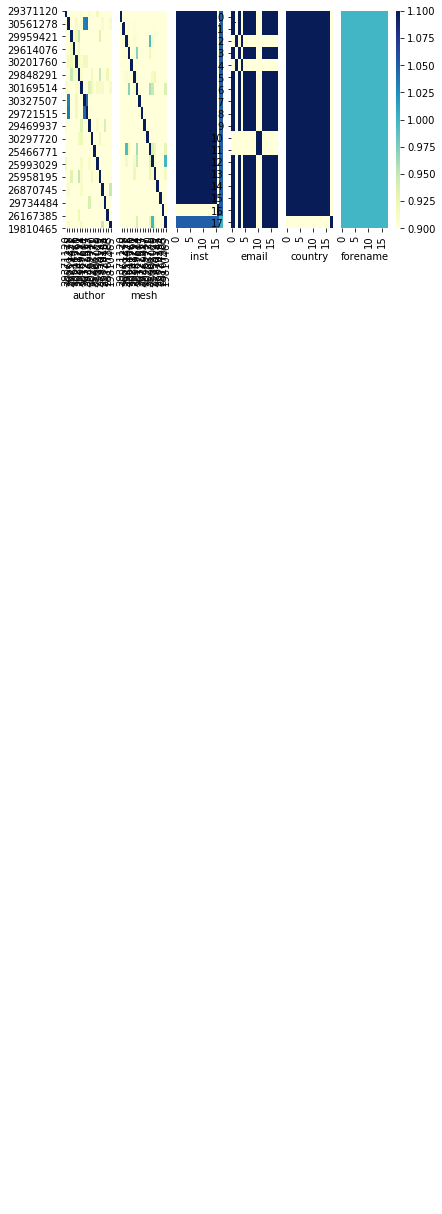

sim matrices shapes for author and mesh:
correlations:
            author      mesh      inst     email   country  forename
author    1.000000  0.860276  0.111784  0.213135  0.091610       NaN
mesh      0.860276  1.000000  0.093688  0.165458  0.031662       NaN
inst      0.111784  0.093688  1.000000 -0.110418  0.140843       NaN
email     0.213135  0.165458 -0.110418  1.000000 -0.095776       NaN
country   0.091610  0.031662  0.140843 -0.095776  1.000000       NaN
forename       NaN       NaN       NaN       NaN       NaN       NaN
similarity statistics:
           author        mesh        inst       email     country  forename
count  324.000000  324.000000  324.000000  324.000000  324.000000     324.0
mean     0.086780    0.075695    0.873457    0.629630    0.895062       1.0
std      0.244452    0.235820    0.300602    0.483651    0.306948       0.0
min      0.000000    0.000000    0.000000    0.000000    0.000000       1.0
25%      0.000000    0.000000    1.000000    0.000000    1.

In [19]:
author_list=['Madabhushi, A','Szeszko, PR']
main(author_list)

In [8]:
df.head(1000).to_json("academix_enriched_mini.json",orient="records")

In [9]:
with open("academix_enriched_mini.json", encoding="utf-8") as f:
    s3func.upload_to_s3(f,'academix_enriched_mini.json')

In [ ]:
print(cluster_dfs[0].cluster.value_counts())

In [ ]:
out_path="/home/ubuntu/data/hecht_jr.csv"
#out_path="/home/ubuntu/data/gottlieb_pa.csv"
cluster_dfs[0].sort_values(["cluster"]).to_csv(out_path, index=False, columns=["pmid", "cluster", "last_author_inst", "last_author_forename","pub_year","last_author_name"])

In [ ]:
# cur_clusters=cluster_dfs[0]
# print(cur_clusters.info())
# print(cur_clusters.cluster.value_counts())
# cur_clusters.to_csv("/home/ubuntu/data/friedman_n.csv", index=False)

In [ ]:
# cur_clusters=cluster_dfs[0][["pmid", "last_author_id", "last_author_inst", 
#                              "last_author_country", "last_author_name",
#                              "last_author_forename", "cluster",
#                             "pub_year", "last_author_affiliation"]].sort_values(["cluster"])
# print(cur_clusters)

In [ ]:
# cm = 'tab20b'
# cur_clusters=cluster_dfs[20][["cluster","pmid","last_author_inst",  "last_author_forename",
#                              "mesh_clean", "other_authors", "last_author_country", "last_author_name"]].reset_index()
# cur_clusters.sort_values('cluster').style.background_gradient(cmap=cm, subset=['cluster']).set_caption('Clustering output')

In [ ]:
def forename_delta(n1, n2):
        if ' ' in n1:
            n1=n1.split()[0]
        if ' ' in n2:
            n2=n2.split()[0]
        if n1==n2:
            if len(n1)>1:
                return 1.0
            else:
                return 0.5
        elif n1 in n2 or n2 in n1:
            return 0.75
        else:
            return 0.0

In [ ]:
forename_delta("Peter A","P A")